# WordCloud

In [74]:

import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# !pip install nltk
# !pip install wordcloud

In [76]:
!pip install konlpy
import re
import konlpy
import pandas as pd

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('/content/drive/MyDrive/DSL/기초세션/22-1학기 기초세션 시각화/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [79]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [81]:
import matplotlib.font_manager as fm
#설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f] 
print(f"nanum_font number: {len(nanum_font)}") #나눔 폰트는 없음.

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberatio

In [82]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [83]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [84]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/Nanum

In [85]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.12
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 10.0


In [86]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [87]:
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',background_color="white")

In [88]:
cloud = wc.generate_from_frequencies(c)

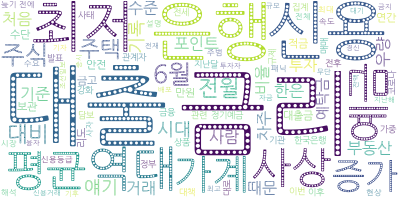

In [89]:
cloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [90]:
train_data = pd.read_csv("/content/drive/MyDrive/DSL/기초세션/22-1학기 기초세션 시각화/train.csv")
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [91]:
# 열 추가
dt_data= pd.to_datetime(train_data["datetime"])
train_data["year"] = dt_data.dt.year
train_data["month"] = dt_data.dt.month
train_data["day"] = dt_data.dt.day
train_data["hour"] = dt_data.dt.hour
train_data["minute"] = dt_data.dt.minute
train_data["second"] = dt_data.dt.second
train_data["weekday"] = dt_data.dt.day_name()

# 기존 열 삭제
train_data.drop(["datetime"], axis=1, inplace = True)




In [92]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,Wednesday
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,Wednesday
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,Wednesday
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,Wednesday


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [93]:
data_by_year = train_data.groupby('year').sum().reset_index()
data_by_year

,year,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,minute,second
0,2011,13620,144,3698,7734,107095.28,125557.720,343782,70074.7104,155817,626162,781979,35452,54126,62738,0,0
1,2012,13667,167,3714,7707,113137.86,131951.525,329914,69259.5080,236318,1067179,1303497,35541,54653,62904,0,0


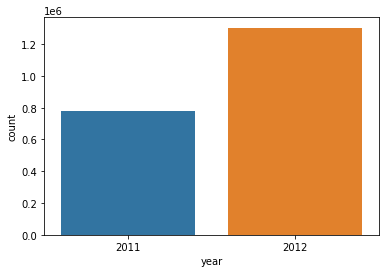

In [94]:
sns.barplot(x='year', y='count', data=data_by_year)
plt.show()

2011년에 비해 2012년 이용량이 약 50% 증가하였다. 공유 자전거 서비스의 활성화로 더 많은 사람들이 이용하는 것을 알 수 있다. 

In [95]:
data_by_month = train_data.groupby('month').sum().reset_index()
data_by_month

,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour,minute,second
0,1,884,71,550,1238,8698.56,10676.580,49426,12891.3360,7252,72632,79884,1778177,8766,10370,0,0
1,2,901,0,638,1314,10630.48,13093.880,50723,12581.3002,9297,89816,99113,1812366,9021,10449,0,0
2,3,901,0,640,1274,14327.86,17134.515,51067,13842.2871,25056,108445,133501,1812366,8989,10453,0,0
3,4,1818,48,597,1302,17015.00,20276.055,50629,14163.2104,39813,127589,167402,1828453,9096,10478,0,0
4,5,1824,0,672,1393,20678.76,24288.725,62093,11212.0882,41285,158862,200147,1834488,9120,10488,0,0
5,6,1824,0,624,1194,24682.82,28261.740,53589,11262.2243,48574,172159,220733,1834488,9120,10488,0,0
6,7,2736,48,600,1145,28127.64,31829.160,53263,10050.1742,50947,163670,214617,1834488,9120,10488,0,0
7,8,2736,0,672,1233,27119.86,30207.265,57466,10881.2355,45870,167646,213516,1834488,9120,10488,0,0
8,9,2727,48,573,1357,23433.14,26897.535,64521,10522.3098,45901,166628,212529,1828455,9094,10482,0,0
9,10,3644,48,623,1392,19070.74,22537.850,63235,10227.3021,38087,169347,207434,1832477,9101,10485,0,0


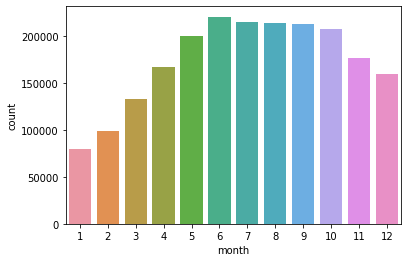

In [96]:
sns.barplot(x='month', y='count', data=data_by_month)
plt.show()

1월달이 일년 중 최저치로 기록되었고, 반면, 6월달이 최고치 기록하였다. 1월부터 6월까지 상승 곡선을 보인다. 이후 6월부터 10월까지 큰 감소 없이 꾸준한 이용세를 보였다. 북반구에 위치한 지역 자료이면 아마도 이용량이 날씨 영향을 받는 듯 하다. 

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [97]:
cols = ['year', 'month']
train_data['year_month'] = train_data[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
train_data
                                            

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday,year_month
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday,2011-1
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday,2011-1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday,2011-1
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday,2011-1
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday,2011-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,Wednesday,2012-12
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,Wednesday,2012-12
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,Wednesday,2012-12
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,Wednesday,2012-12


In [98]:
data_by_year_month = train_data.groupby('year_month').sum().reset_index()
pd.to_datetime(data_by_year_month['year_month'])
data_by_year_month

,year_month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-1,431,24,264,621,3721.16,4641.000,24269,5926.1768,2008,21544,23552,866741,431,4235,5135,0,0
1,2011-10,1820,24,287,698,9511.18,11265.905,32565,4992.1834,17159,62363,79522,915005,4550,4541,5241,0,0
2,2011-11,1824,24,312,608,7312.76,8854.290,29242,5523.1718,10155,60734,70889,917016,5016,4560,5244,0,0
3,2011-12,1824,0,312,635,5881.04,7318.740,29768,4926.2286,5079,56104,61183,917016,5472,4560,5244,0,0
4,2011-2,446,0,327,615,5053.66,6243.965,23897,6917.1470,3776,29068,32844,896906,892,4467,5208,0,0
5,2011-3,446,0,328,654,6272.18,7535.435,24942,7151.1043,7910,30825,38735,896906,1338,4440,5211,0,0
6,2011-4,910,24,287,737,8088.48,9664.125,30160,7209.1263,12229,38288,50517,915005,1820,4549,5241,0,0
7,2011-5,912,0,336,697,9817.04,11607.545,32568,5634.0434,15865,63848,79713,917016,2280,4560,5244,0,0
8,2011-6,912,0,312,583,12855.14,14660.815,26581,5440.1253,19600,70176,89776,917016,2736,4560,5244,0,0
9,2011-7,1368,24,288,540,13665.30,15509.315,27544,5454.1216,26145,66703,92848,917016,3192,4560,5244,0,0


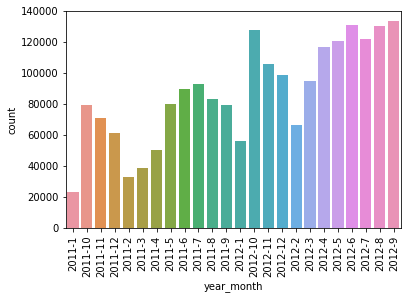

In [99]:
sns.barplot(x='year_month', y='count', data=data_by_year_month)
plt.xticks(rotation=90)
plt.show()

2011년과 2012년의 1월, 12월을 놓고 봤을 때, 2012에 비해 2011년 1월 이용량이 현저히 낮다. 각 연도에서도 1월과 12월 간 많은 차이를 보이기도 한다. 이러한 이유들로 1월이 12월보다 많이 차이난다고 볼 수 있다.  

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

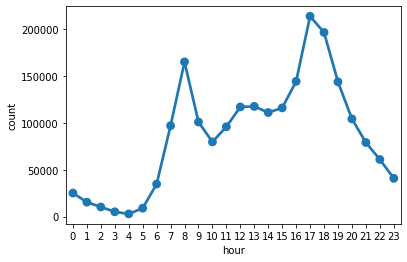

In [100]:
data_by_hour = train_data.groupby('hour').sum().reset_index()
data_by_hour
sns.pointplot(data=data_by_hour, x='hour', y='count')

하루에 2번 이용량이 급증하는 시간대가 있다. 아침 7시부터 9시 사이에 이용량이 급증하고, 16시~19시에서도 마찬가지로 이용량이 급증한다. 

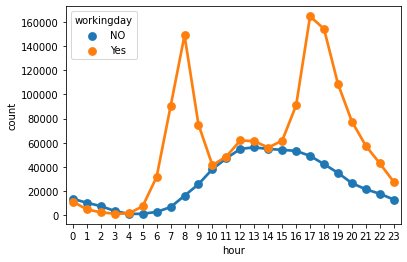

In [101]:
data_by_workingday = train_data.groupby(['workingday','hour']).sum().reset_index()
data_by_workingday['workingday'] = data_by_workingday['workingday'].map({0:'NO', 1:'Yes'})
data_by_workingday
sns.pointplot(data=data_by_workingday
, x='hour', y='count', hue='workingday')
plt.show()

일하지 않는 날은 점심시간대에 이용량이 와만히 증가한다. 반면, 일하는 날은 이전에 보여준 그래프와 유사하게 아침, 저녁 시간대에 급증한다. 일하는 날 회사 혹은 학교로 가기 위한 용도로 공유 자전거를 사용하는 거승로 보인다. 

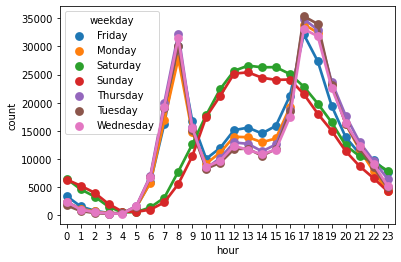

In [102]:
data_by_weekday = train_data.groupby(['weekday','hour']).sum().reset_index()
data_by_weekday
sns.pointplot(data=data_by_weekday
, x='hour', y='count', hue='weekday')
plt.show()

앞서 본 그래프와 유사한 형태를 띄었다. 주말과 주장 차이과 확연하게 드러났다고 볼 수 있다. 금요일처럼 주말에 가까운 날은 양상이 다를 것으로 기대했는데. 주중과 주말은 각각 특징을 그대로 드러났다. 

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [103]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

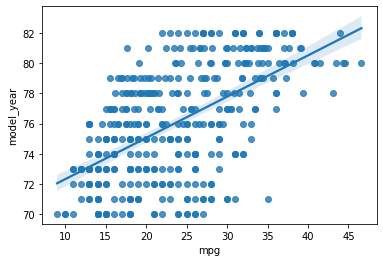

In [104]:
sns.regplot(x='mpg', y='model_year', data=mpg)

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
